In [2]:
import random
import math
import numpy as np
import sys

sys.path.extend(["../../modules", "../"])

In [3]:
from problem import f, pds, constraints, check_all_constraints, print_all_constraints

In [4]:
###### Gradient Descent stuff
'''
        pds          :   An object of partial differentials problem function which is being investigated by the metaheuristic.
        constraints  :   An array of constraint functions which return true or false.
        GD_defaults  :   Default values of following parameters: x_0s, max_i, step_m, e_g, e_x 
        max_i        :   The maximum amount of iterations.
        x_0s         :   An object of starting values, one per dimension.
        step_m       :   The multipler of the step size.
        e_g          :   The tolerance of the gradient.
        e_x          :   The tolerance of the difference in x.
'''

class GD_defaults:
    def __init__(self, is_maximisation, x_0s, max_i, step_m, e_g, e_x):
        self.is_maximisation = is_maximisation
        self.x_0s = x_0s
        self.max_i = max_i
        self.step_m = step_m
        self.e_g = e_g
        self.e_x = e_x

def gradient_descent(pds, constraints, DEFAULTS, is_maximisation = None, x_0s = None, max_i = None, step_m = None, e_g = None, e_x = None, print_workings = False):
    # Default parameters
    is_maximisation = DEFAULTS.is_maximisation if is_maximisation is None else is_maximisation
    x_0s = DEFAULTS.x_0s if x_0s is None else x_0s
    max_i = DEFAULTS.max_i if max_i is None else max_i
    step_m = DEFAULTS.step_m if step_m is None else step_m
    e_g = DEFAULTS.e_g if e_g is None else e_g
    e_x = DEFAULTS.e_x if e_x is None else e_x
    
    # Set the current x and create a way of storing the previous steps.
    current_xs = x_0s
    gs = {d: round(pds[d](v), 3) for d, v in current_xs.items()}
    step_array = []
    
    # Whether to print the workings
    if (print_workings == True):
        print("--------------------------------------------------------------------------------------------\nIteration\tX\tg\tdiff\nStart (0)\t{}\t{}\t{}".format({k: round(v, 3) for k, v in current_xs.items()}, gs, "N/A"))
        
    
    # Loop for a maximum of max_i
    for i in range(max_i):
        # Check if constraints are satisfied before continuing
        if (not check_all_constraints(current_xs, constraints)):
            if (i == 0):
                return([], False)
            current_xs = step_array[-1]
            step_array.pop()
            break
        # Set previous x
        step_array.append(current_xs)
        # Find the current x
        if (not is_maximisation):
            step_m = -step_m
        current_xs = {d: round(v + step_m*gs[d], 3) for d, v in current_xs.items()}
        # Get a new gradient
        gs = {d: round(pds[d](v), 3) for d, v in current_xs.items()}
        gavg = 0
        for d, v in gs.items():
            gavg += v
        gavg /= len(gs)
        # Find difference in x
        diff = 0
        for d, v in current_xs.items():
            diff += (v - step_array[i][d])**2
        diff = round(math.sqrt(diff), 3)
        # Whether to print the workings
        if (print_workings == True):
            print("{}\t\t{}\t{}\t{}".format(i+1, {k: round(v, 3) for k, v in current_xs.items()}, gs, diff))
        # Check if either of the tolerance conditions are met, if so stop the loop. 
        if (abs(gavg) < e_g or abs(diff) < e_x):
            break
    
    # Add final x to step_array
    step_array.append(current_xs)
    # Return a tuple of all steps and final answer
    return (step_array, current_xs)

In [5]:
x_0s = {"x1": 0, "x2": 0, "x3": 0, "x4": 0}
max_i = 1000
step_m = 0.1
e_g = 0.001
e_x = 0.001

DEFAULTS = GD_defaults(True, x_0s, max_i, step_m, e_g, e_x)

In [6]:
results = gradient_descent(pds, constraints, DEFAULTS, print_workings=True)

--------------------------------------------------------------------------------------------
Iteration	X	g	diff
Start (0)	{'x3': 0, 'x4': 0, 'x1': 0, 'x2': 0}	{'x3': 4, 'x4': 1, 'x1': 3, 'x2': 5}	N/A
1		{'x3': 0.4, 'x4': 0.1, 'x1': 0.3, 'x2': 0.5}	{'x3': 4, 'x4': 1, 'x1': 3, 'x2': 5}	0.714
2		{'x3': 0.8, 'x4': 0.2, 'x1': 0.6, 'x2': 1.0}	{'x3': 4, 'x4': 1, 'x1': 3, 'x2': 5}	0.714
3		{'x3': 1.2, 'x4': 0.3, 'x1': 0.9, 'x2': 1.5}	{'x3': 4, 'x4': 1, 'x1': 3, 'x2': 5}	0.714
4		{'x3': 1.6, 'x4': 0.4, 'x1': 1.2, 'x2': 2.0}	{'x3': 4, 'x4': 1, 'x1': 3, 'x2': 5}	0.714


In [7]:
print_all_constraints(results[1], constraints)
print("Profit: ", f(results[1]))

x1 not -ve constraint: 0 <= 0.9
x2 not -ve constraint: 0 <= 1.5
x3 not -ve constraint: 0 <= 1.2
x4 not -ve constraint: 0 <= 0.3
green constraint: 5.4 <= 10
red constraint: 6.0 <= 6
blue constraint: 4.2 <= 10
yellow constraint: 6.9 <= 18
brown constraint: 2.1 <= 8
purple constraint: 4.5 <= 12
Profit:  15.3


In [7]:
# Imports my plotting module
import batch_plotting as batch_plt

# Imports my spiral coordinate generating module
from utilities import n_dim_spiral

In [8]:
# Batch testing start position
starting_point_results = []
spiral = n_dim_spiral({"x1": 0, "x2": 0, "x3": 0, "x4": 0}, 2000, 0.05)
for i in range(len(spiral)):
    ps = spiral[i]
    result = gradient_descent(pds, constraints, DEFAULTS, x_0s = ps)
    starting_point_results.append({"x": i, "y": f(result[1]) if result[1] is not False else False})

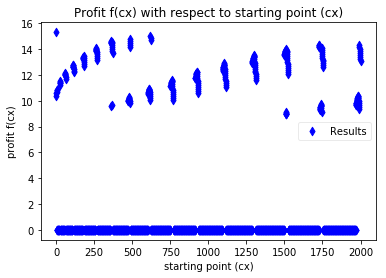

In [9]:
batch_plt.plot_2d_batch_accuracy("profit f(cx)", "starting point (cx)", False, starting_point_results)

In [10]:
spiral[0]

{'x1': 0, 'x2': 0, 'x3': 0, 'x4': 0}

In [11]:
starting_point_results

[{'x': 0, 'y': 15.3},
 {'x': 1, 'y': 10.35},
 {'x': 2, 'y': 10.6},
 {'x': 3, 'y': 10.799999999999999},
 {'x': 4, 'y': 10.85},
 {'x': 5, 'y': 10.7},
 {'x': 6, 'y': False},
 {'x': 7, 'y': False},
 {'x': 8, 'y': False},
 {'x': 9, 'y': False},
 {'x': 10, 'y': False},
 {'x': 11, 'y': False},
 {'x': 12, 'y': False},
 {'x': 13, 'y': False},
 {'x': 14, 'y': False},
 {'x': 15, 'y': False},
 {'x': 16, 'y': False},
 {'x': 17, 'y': False},
 {'x': 18, 'y': False},
 {'x': 19, 'y': False},
 {'x': 20, 'y': False},
 {'x': 21, 'y': False},
 {'x': 22, 'y': 11.399999999999999},
 {'x': 23, 'y': 11.45},
 {'x': 24, 'y': 11.5},
 {'x': 25, 'y': 11.350000000000001},
 {'x': 26, 'y': 11.200000000000001},
 {'x': 27, 'y': False},
 {'x': 28, 'y': False},
 {'x': 29, 'y': False},
 {'x': 30, 'y': False},
 {'x': 31, 'y': False},
 {'x': 32, 'y': False},
 {'x': 33, 'y': False},
 {'x': 34, 'y': False},
 {'x': 35, 'y': False},
 {'x': 36, 'y': False},
 {'x': 37, 'y': False},
 {'x': 38, 'y': False},
 {'x': 39, 'y': False},
 {

In [12]:
best = gradient_descent(pds, constraints, DEFAULTS, x_0s = spiral[0], print_workings=True)

--------------------------------------------------------------------------------------------
Iteration	X	g	diff
Start (0)	{'x1': 0, 'x2': 0, 'x3': 0, 'x4': 0}	{'x1': 3, 'x2': 5, 'x3': 4, 'x4': 1}	N/A
1		{'x1': 0.3, 'x2': 0.5, 'x3': 0.4, 'x4': 0.1}	{'x1': 3, 'x2': 5, 'x3': 4, 'x4': 1}	0.714
2		{'x1': 0.6, 'x2': 1.0, 'x3': 0.8, 'x4': 0.2}	{'x1': 3, 'x2': 5, 'x3': 4, 'x4': 1}	0.714
3		{'x1': 0.9, 'x2': 1.5, 'x3': 1.2, 'x4': 0.3}	{'x1': 3, 'x2': 5, 'x3': 4, 'x4': 1}	0.714
4		{'x1': 1.2, 'x2': 2.0, 'x3': 1.6, 'x4': 0.4}	{'x1': 3, 'x2': 5, 'x3': 4, 'x4': 1}	0.714


In [13]:
print_all_constraints(best[1], constraints)
print("Profit: ", f(best[1]))

x1 not -ve constraint: 0 <= 0.9
x2 not -ve constraint: 0 <= 1.5
x3 not -ve constraint: 0 <= 1.2
x4 not -ve constraint: 0 <= 0.3
green constraint: 5.4 <= 10
red constraint: 6.0 <= 6
blue constraint: 4.2 <= 10
yellow constraint: 6.9 <= 18
brown constraint: 2.1 <= 8
purple constraint: 4.5 <= 12
Profit:  15.3
